# Notebook for statistical research analysis

In [144]:
import numpy as np
import pandas as pd
import sklearn as sk
import statsmodels.api as sm
import plotly.express as px
import statsmodels.tsa.api
from statsmodels.tsa.api import VAR


## To-do list for this 
### Question 1: What statistical fields have seen the largest increase in publications?
- Rate of change
- Look at different time frames
### Question 2: How have the most published statistical fields changed over time?
- Ordering by count, top 3-5 (variable based on observation)
- Try to find external sources and link to developments
### Question 3: What statistical fields are projected to grow the most in the coming years?
- Little bit of modeling
- Also look at recent rates of change and trend analysis

In [145]:
stats_data = pd.read_csv('stats_data.csv')

## Question 1

In [146]:
cat_year_num = stats_data.groupby(['category', 'year']).count()['Unnamed: 0'].reset_index()
cat_year_num.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
print(pd.unique(cat_year_num.category))

['Applications (Statistics)' 'Computation (Statistics)'
 'Data Analysis, Statistics and Probability'
 'Machine Learning (Statistics)' 'Methodology (Statistics)'
 'Other Statistics' 'Statistics Theory']


In [147]:
#Saving colors for each topic for later
default = px.colors.qualitative.Plotly

color_dict = {'Applications (Statistics)': default[0], 'Computation (Statistics)':default[1], 'Data Analysis, Statistics and Probability':default[2],'Machine Learning (Statistics)':default[3], 'Methodology (Statistics)':default[4], 'Other Statistics':default[5], 'Statistics Theory':default[6]}

### Bar plots for individual statistical topics

In [148]:
top = 'Applications (Statistics)'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [149]:
top = 'Computation (Statistics)'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [150]:
top = 'Data Analysis, Statistics and Probability'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [151]:
top = 'Machine Learning (Statistics)'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [152]:
top = 'Methodology (Statistics)'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [153]:
top = 'Other Statistics'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

In [154]:
top = 'Statistics Theory'
px.bar(cat_year_num.query("category == @top"), x = 'year', y = 'count', title= top + " Papers by Year", color_discrete_sequence=[color_dict[top]])

### Calculating percent increases per subtopic and identifying the max output and its associated year

In [155]:
topics = pd.unique(cat_year_num.category)

In [156]:
topics

array(['Applications (Statistics)', 'Computation (Statistics)',
       'Data Analysis, Statistics and Probability',
       'Machine Learning (Statistics)', 'Methodology (Statistics)',
       'Other Statistics', 'Statistics Theory'], dtype=object)

In [157]:
cat_year_num.query('category == @topics[0]')['count'].pct_change()

0          NaN
1     1.000000
2     0.000000
3    -0.500000
4     1.000000
5     4.000000
6    -0.700000
7     1.000000
8     1.000000
9     1.916667
10   -0.314286
11    0.291667
12    0.225806
13    0.289474
14   -0.571429
15   -0.238095
16   -0.312500
17    0.272727
Name: count, dtype: float64

In [158]:
pct_change = cat_year_num.groupby(['category'])['count'].pct_change() * 100
cat_year_num['pct'] = pd.Series(pct_change)
cat_year_num

,category,year,count,pct
0,Applications (Statistics),2007,1,NaN
1,Applications (Statistics),2008,2,100.000000
2,Applications (Statistics),2009,2,0.000000
3,Applications (Statistics),2010,1,-50.000000
4,Applications (Statistics),2011,2,100.000000
...,...,...,...,...
107,Statistics Theory,2020,39,-11.363636
108,Statistics Theory,2021,10,-74.358974
109,Statistics Theory,2022,10,0.000000
110,Statistics Theory,2023,2,-80.000000


In [159]:
for x in topics:
    fig = px.line(cat_year_num.query("category == @x"), x = "year", y = "pct", color_discrete_sequence=[color_dict[x]], title="Percentage change in publication count: " + x)
    fig.show()

In [160]:
px.line(cat_year_num, x = "year", y = "pct", color='category', facet_col='category',title="Percentage change in publication count: All topics")

In [161]:
avg_pct_growth = cat_year_num.groupby(['category'])['pct'].mean().reset_index()
px.bar(avg_pct_growth, x = 'category', y = 'pct', color='category', title = "Average percentage growth (year to year) by subfield")

In [162]:
count_groups = cat_year_num.groupby('category').agg(first=('count', 'first'), last=('count', 'last'))
count_groups['ratio'] = count_groups['last'] / count_groups['first']
count_groups = count_groups.reset_index()
count_groups

,category,first,last,ratio
0,Applications (Statistics),1,14,14.000000
1,Computation (Statistics),3,14,4.666667
2,"Data Analysis, Statistics and Probability",1,1,1.000000
3,Machine Learning (Statistics),21,645,30.714286
4,Methodology (Statistics),4,87,21.750000
5,Other Statistics,1,1,1.000000
6,Statistics Theory,1,1,1.000000


In [163]:
#Comparing the 2024 paper counts vs the first paper publication year's counts

px.bar(count_groups, x = 'category', y = 'ratio', color='category', title="Ratio of 2024 paper count to initial paper count")

## Question 2

How have the top fields changed? Look at the top categories per year in paper output

In [164]:
top_4 = cat_year_num.groupby('year').apply(lambda x: x.nlargest(4, 'count')).reset_index(drop=True)
top_4

/tmp/ipykernel_117494/3017204090.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,category,year,count,pct
0,Statistics Theory,2005,1,NaN
1,Machine Learning (Statistics),2007,21,NaN
2,Statistics Theory,2007,8,700.000000
3,Methodology (Statistics),2007,4,NaN
4,Applications (Statistics),2007,1,NaN
...,...,...,...,...
68,Computation (Statistics),2023,5,-54.545455
69,Machine Learning (Statistics),2024,645,25.486381
70,Methodology (Statistics),2024,87,47.457627
71,Applications (Statistics),2024,14,27.272727


In [165]:
px.bar(top_4, x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: All years")

For scaling reasons, I will break up the time span into chunks

In [166]:
px.bar(top_4.query('year <= 2011'), x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: Up until 2011")

#### Year  - topics in order (G to L)

- 2005 : Statistics Theory
- 2006 : NA
- 2007 : Machine Learning, Statistics Theory, Methodology, Applications
- 2008 : Machine Learning, (TIE) Statistics Theory and Methodology, Computation
- 2009 : Machine Learning, Statistics Theory, Methodology, Computation
- 2010 : Machine Learning, Methodology, TIE (Statistics Theory and Computation)
- 2011 : Machine Learning, Methodology, Computation, Applications

In [167]:
px.bar(top_4.query('year >= 2011 & year <= 2015'), x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: 2011 - 2015")

- 2012 : Machine Learning, Methodology, Statistics Theory, Computation
- 2013 : Machine Learning, Methodology, Computation, Applications
- 2014 : Machine Learning, Methodology, Computation, Statistics Theory
- 2015 : Machine Learning, TIE (Methodology and Computation), Applications 

In [168]:
px.bar(top_4.query('year >= 2015 & year <= 2020'), x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: 2015 - 2020")

- 2016 : Machine Learning, Methodology, Applications, Computation
- 2017 : Machine Learning, Methodology, Aplications, Statistics Theory
- 2018 : Machine Learning, Methodology, Computation, Applications
- 2019 : Machine Learning, Methodology, Statistics Theory, Applications
- 2020 : Machine Learning, Methodology, Applications, Statistics Theory

In [169]:
px.bar(top_4.query('year >= 2020'), x = 'year', y = 'count', color='category', title="Top 4 categories by paper output: 2020 - 2024")

- 2021 : Machine Learning, Methodology, Applications, Statistics Theory
- 2022 : Machine Learning, Methodology, Applications, Computation
- 2023 : Machine Learning, Methodology, Applications, Computation
- 2024 : Machine Learning, Methodology, TIE (Applications and Computation)

### One definitive top topics list

- 2005 : Statistics Theory
- 2006 : NA
- 2007 : Machine Learning, Statistics Theory, Methodology, Applications
- 2008 : Machine Learning, (TIE) Statistics Theory and Methodology, Computation
- 2009 : Machine Learning, Statistics Theory, Methodology, Computation
- 2010 : Machine Learning, Methodology, TIE (Statistics Theory and Computation)
- 2011 : Machine Learning, Methodology, Computation, Applications
- 2012 : Machine Learning, Methodology, Statistics Theory, Computation
- 2013 : Machine Learning, Methodology, Computation, Applications
- 2014 : Machine Learning, Methodology, Computation, Statistics Theory
- 2015 : Machine Learning, TIE (Methodology and Computation), Applications 
- 2016 : Machine Learning, Methodology, Applications, Computation
- 2017 : Machine Learning, Methodology, Aplications, Statistics Theory
- 2018 : Machine Learning, Methodology, Computation, Applications
- 2019 : Machine Learning, Methodology, Statistics Theory, Applications
- 2020 : Machine Learning, Methodology, Applications, Statistics Theory
- 2021 : Machine Learning, Methodology, Applications, Statistics Theory
- 2022 : Machine Learning, Methodology, Applications, Computation
- 2023 : Machine Learning, Methodology, Applications, Computation
- 2024 : Machine Learning, Methodology, TIE (Applications and Computation)

With starting analysis from 2007 (due to the NA for 2006), Machine Learning has been KING with Methodology second and Applications a clear third

## Question 3: What statistical fields are projected to grow the most in the coming years?

In [170]:
# Using 2015 as a reference

recent = cat_year_num.query("year >= 2015")
recent_growth = recent.groupby(['category'])['pct'].mean().reset_index()
px.bar(recent_growth, x = 'category', y = 'pct', color = 'category', title='Average yearly growth (percentage) since 2015')

We can see recent increases in Methodology and Computation (meaning our assertion of statistical growth being linked to the growth of computation may have some truth)

### Time Series Prediction

Our initial stats data we used here was yearly, but for predicting future rates of change in these fields, we want to use all the monthly data from the original dataset.

In [171]:
original = pd.read_parquet("arXiv.parquet")

In [172]:
original

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,1993-08-01,1993-08-01,['M. L. Ginsberg'],'M. L. Ginsberg',Because of their occasional need to return to ...,79
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,1993-08-01,1993-08-01,['M. P. Wellman'],'M. P. Wellman',Market price systems constitute a well-underst...,119
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,1993-09-01,1993-09-01,"['I. P. Gent', 'T. Walsh']",'I. P. Gent',We describe an extensive study of search in GS...,167
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,1993-11-01,1993-11-01,"['F. Bergadano', 'D. Gunetti', 'U. Trinchero']",'F. Bergadano',As real logic programmers normally use cut (!)...,174
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,1993-11-01,1993-11-01,"['J. C. Schlimmer', 'L. A. Hermens']",'J. C. Schlimmer',To support the goal of allowing users to recor...,187
...,...,...,...,...,...,...,...,...,...,...
136233,abs-2408.08541v1,Where is the signal in tokenization space?,Computation and Language (Natural Language Pro...,cs.CL,2024-08-16,2024-08-16,"['Renato Lui Geh', 'Honghua Zhang', 'Kareem Ah...",'Renato Lui Geh',Large Language Models (LLMs) are typically shi...,170
136234,abs-2408.08564v1,Collaborative Cross-modal Fusion with Large La...,Information Retrieval,cs.IR,2024-08-16,2024-08-16,"['Zhongzhou Liu', 'Hao Zhang', 'Kuicai Dong', ...",'Zhongzhou Liu',Despite the success of conventional collaborat...,157
136235,abs-2408.08624v1,RealMedQA: A pilot biomedical question answeri...,Computation and Language (Natural Language Pro...,cs.CL,2024-08-16,2024-08-16,"['Gregory Kell', 'Angus Roberts', 'Serge Umans...",'Gregory Kell',Clinical question answering systems have the p...,153
136236,abs-2408.08648v1,Understanding Enthymemes in Argument Maps: Bri...,Artificial Intelligence,cs.AI,2024-08-16,2024-08-16,"['Jonathan Ben-Naim', 'Victor David', 'Anthony...",'Jonathan Ben-Naim',Argument mining is natural language processing...,194


In [173]:
original.published_date = pd.to_datetime(original.published_date)
original['year'] = original.published_date.dt.year
original['month'] = original.published_date.dt.month

copy = original

original = original.query("year != 2025") #Want full year data (2025 incomplete)

In [174]:
categories = pd.Series(pd.unique(original.category))
stats_topics = pd.Series(categories[categories.astype(str).str.contains("Statistics")])
stats_date = original.query('category.isin(@stats_topics)').groupby(['published_date', 'category']).size().reset_index(name='count').query("count > 0")

In [175]:
stats_date

,published_date,category,count
0,2005-09-29,Statistics Theory,1
1,2007-01-07,Statistics Theory,1
2,2007-04-09,Statistics Theory,1
3,2007-04-13,Applications (Statistics),1
4,2007-05-02,Statistics Theory,1
...,...,...,...
5215,2024-12-29,Computation (Statistics),1
5216,2024-12-29,Machine Learning (Statistics),1
5217,2024-12-29,Methodology (Statistics),1
5218,2024-12-30,Machine Learning (Statistics),2


With this dataset of paper counts and dates, first we want to see if there is any sort of dependency between all statistical topics.

In [176]:
corr_df = stats_date.pivot_table(index='published_date', columns='category', fill_value=0)

In [177]:
cn = pd.Series(pd.unique(stats_date.category)).sort_values()
corr_df.columns = cn
corr_df

,Applications (Statistics),Computation (Statistics),"Data Analysis, Statistics and Probability",Machine Learning (Statistics),Methodology (Statistics),Other Statistics,Statistics Theory
published_date,,,,,,,
2005-09-29,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-01-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-04-09,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-04-13,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-05-02,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2024-12-26,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2024-12-27,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2024-12-29,0.0,1.0,0.0,1.0,1.0,0.0,0.0


<Axes: >

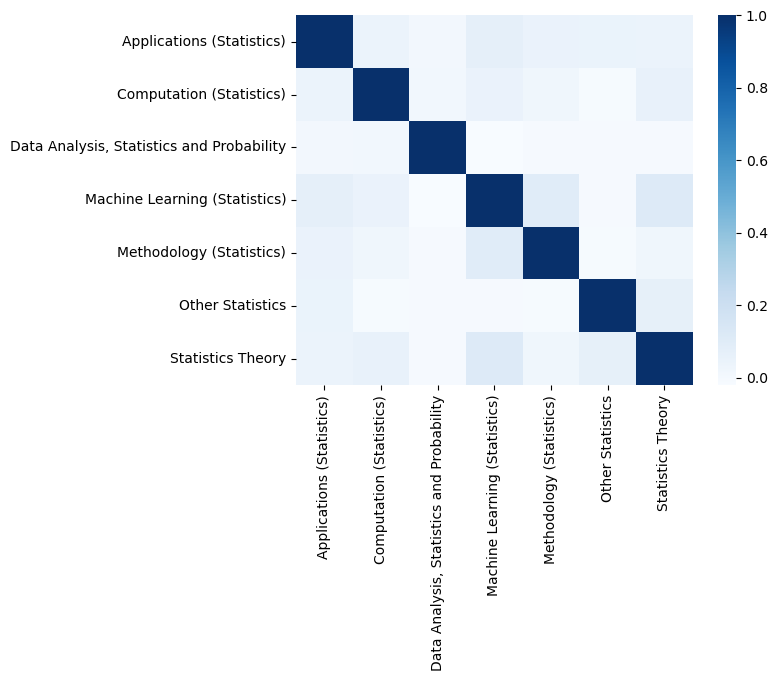

In [178]:
import seaborn as sb
sb.heatmap(corr_df.corr(), cmap='Blues')

From this, we can see that topic correlation is very low. Next we test for the stationarity of the data.

In [179]:
from statsmodels.tsa.stattools import adfuller

app_test = adfuller(corr_df['Applications (Statistics)'].values)
app_test

(np.float64(-14.704384404838528),
 np.float64(2.9128503694490928e-27),
 12,
 3943,
 {'1%': np.float64(-3.4320095389991705),
  '5%': np.float64(-2.8622732935270228),
  '10%': np.float64(-2.56716034045187)},
 np.float64(978.0418504568133))

Based on the p value here (the second float value) we can reject the null hypothesis and claim this time series is stationary. We'll repeat this process for all of our topic variables.

In [180]:
comp_test = adfuller(corr_df['Computation (Statistics)'].values)
comp_test

(np.float64(-9.620537140561407),
 np.float64(1.7138204914043168e-16),
 29,
 3926,
 {'1%': np.float64(-3.432016729687226),
  '5%': np.float64(-2.862276469956464),
  '10%': np.float64(-2.567162031453515)},
 np.float64(465.9516432820237))

In [181]:
dsp_test = adfuller(corr_df['Data Analysis, Statistics and Probability'].values)
dsp_test

(np.float64(-63.53643897450045),
 0.0,
 0,
 3955,
 {'1%': np.float64(-3.4320045004616855),
  '5%': np.float64(-2.862271067788467),
  '10%': np.float64(-2.567159155560102)},
 np.float64(-6522.3029131599815))

In [182]:
ml_test = adfuller(corr_df['Machine Learning (Statistics)'].values)
ml_test

(np.float64(-7.393676245786423),
 np.float64(7.879726500540191e-11),
 19,
 3936,
 {'1%': np.float64(-3.432012492343266),
  '5%': np.float64(-2.8622745981442903),
  '10%': np.float64(-2.5671610349768037)},
 np.float64(16268.936330288921))

In [183]:
met_test = adfuller(corr_df['Methodology (Statistics)'].values)
met_test

(np.float64(-7.646895072241326),
 np.float64(1.8324946919300654e-11),
 29,
 3926,
 {'1%': np.float64(-3.432016729687226),
  '5%': np.float64(-2.862276469956464),
  '10%': np.float64(-2.567162031453515)},
 np.float64(5661.403911100002))

In [184]:
ot_test = adfuller(corr_df['Other Statistics'].values)
ot_test

(np.float64(-63.01645144044758),
 0.0,
 0,
 3955,
 {'1%': np.float64(-3.4320045004616855),
  '5%': np.float64(-2.862271067788467),
  '10%': np.float64(-2.567159155560102)},
 np.float64(-12717.869628493347))

In [185]:
st_test = adfuller(corr_df['Statistics Theory'].values)
st_test

(np.float64(-9.822120246295285),
 np.float64(5.3039924719679993e-17),
 26,
 3929,
 {'1%': np.float64(-3.432015456217749),
  '5%': np.float64(-2.862275907411977),
  '10%': np.float64(-2.5671617319776505)},
 np.float64(281.33665033793295))

Based on all of these tests, it seems that all of our individual time series have data that can be considered stationary. With this, we choose a Vector Autoregression model for this multivariate time series despite our relatively weak dependencies between variables.

#### VAR with statsmodels

In [186]:
#Reshaping the data for creating the VAR model

corr_df['month'] = corr_df.index.month
corr_df['year'] = corr_df.index.year

In [187]:
date_ind = corr_df[['month', 'year']].astype(int).astype(str)

In [188]:
month_yr = date_ind['month'] + "/" + date_ind['year']

In [189]:
from statsmodels.tsa.base.datetools import dates_from_str
month_yr = dates_from_str(month_yr)

In [190]:
sub = corr_df.iloc[:, 0:7]
sub.index = pd.DatetimeIndex(month_yr).to_period('M')
sub = sub.diff().dropna()

In [191]:
np.floor(sub.shape[0] * 0.3)
train = sub[:-1186]
test = sub[-1186:]

In [192]:
model = VAR(train)
lag = model.select_order(30)
lag.selected_orders

{'aic': np.int64(16),
 'bic': np.int64(6),
 'hqic': np.int64(9),
 'fpe': np.int64(16)}

Based on this I will choose 9 lags (as a compromise between the AIC and BIC)

In [193]:
var_mod = VAR(train)
fitted = var_mod.fit(maxlags=9)
fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Mar, 2025
Time:                     00:29:07
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -16.7274
Nobs:                     2760.00    HQIC:                  -17.3415
Log likelihood:          -2555.36    FPE:                2.07912e-08
AIC:                     -17.6888    Det(Omega_mle):     1.77088e-08
--------------------------------------------------------------------
Results for equation Applications (Statistics)
                                                  coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------
const                                                0.000568         0.005222            0.109           0.913
L1.Applications (Statistics)

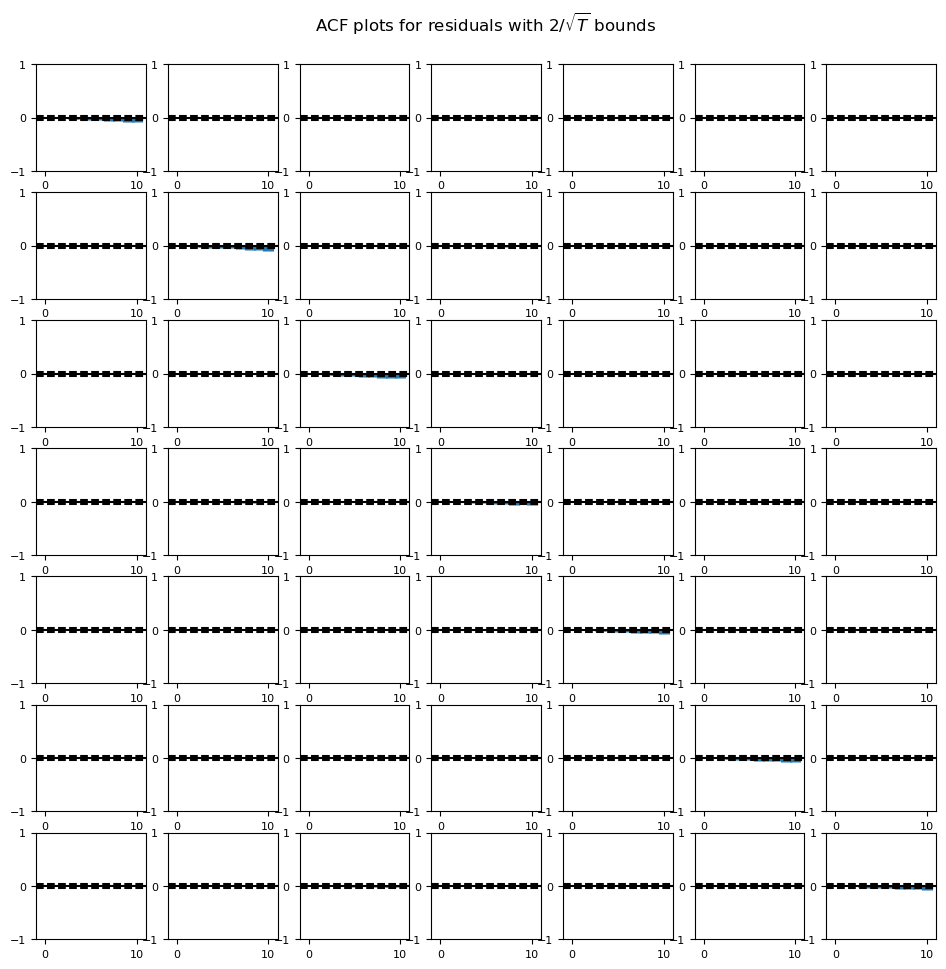

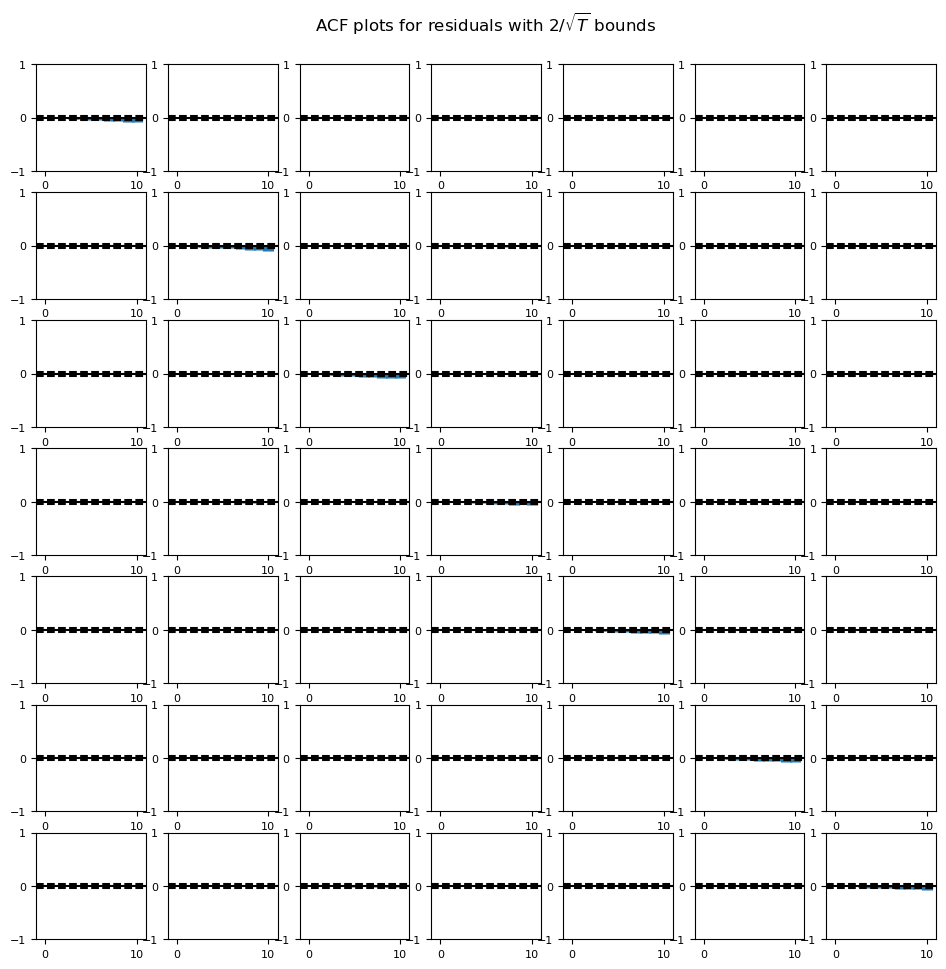

In [194]:
fitted.plot_acorr()

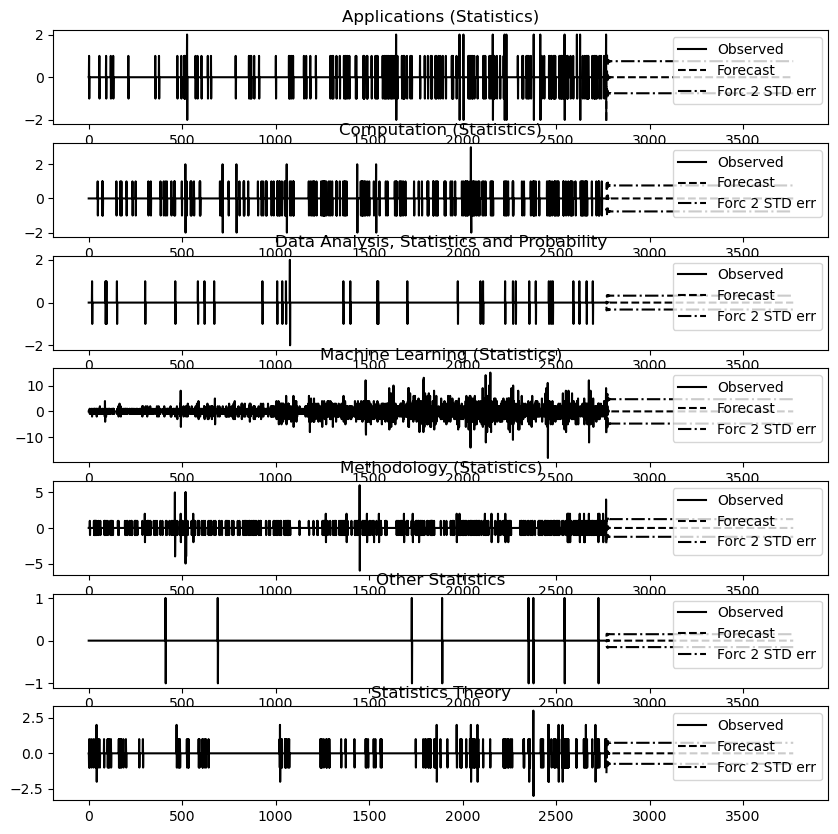

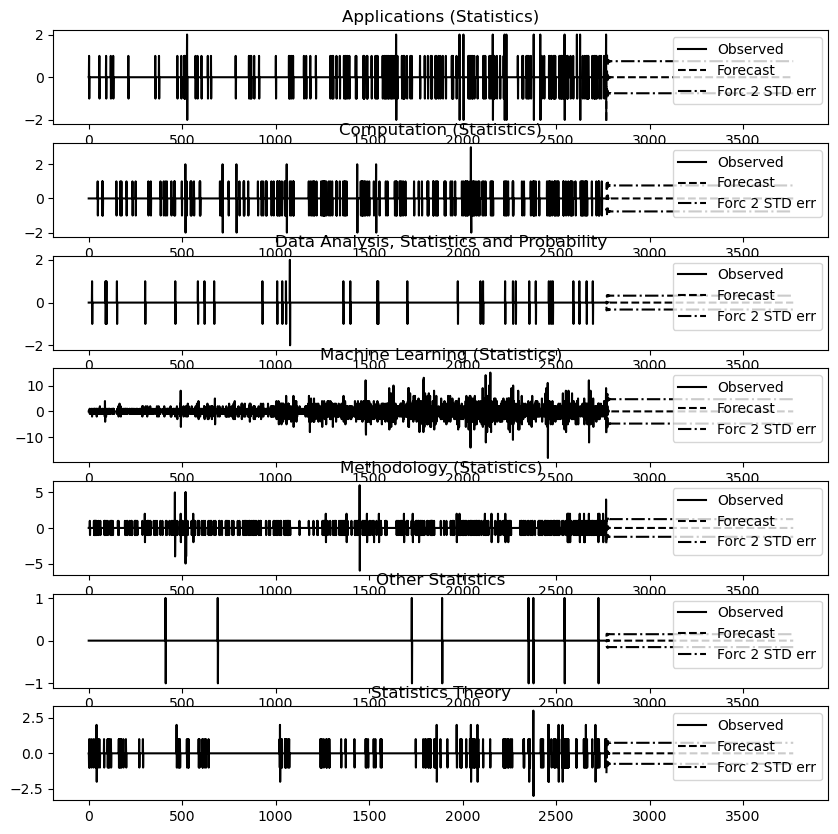

In [195]:
fitted.plot_forecast(steps = 1000)

### Trying to use SKLEARN

In [196]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries

In [197]:
data = corr_df.iloc[:, 0:7].fillna(0)

In [198]:
forecaster = ForecasterAutoregMultiSeries(
                 regressor          = LGBMRegressor(random_state=0, verbose=-1),
                 lags               = 9,
                 encoding           = 'ordinal',
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None,
                 series_weights     = None,
                 differentiation    = None,
                 dropna_from_series = False,
                 fit_kwargs         = None,
                 forecaster_id      = None
             )

forecaster.fit(series=train)
forecaster

/home/narenprax/Documents/VSCode Projects/stats140finalproj/.pixi/envs/default/lib/python3.13/site-packages/skforecast/utils/utils.py:1135: UserWarning:

Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.



ForecasterAutoregMultiSeries 
Regressor: LGBMRegressor(random_state=0, verbose=-1) 
Lags: [1 2 3 4 5 6 7 8 9] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal 
Window size: 9 
Series levels (names): Applications (Statistics), Computation (Statistics), Data Analysis, Statistics and Probability, Machine Learning (Statistics), Methodology (Statistics), ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: 'Applications (Statistics)': ['0', '2768'], 'Computation (Statistics)': ['0', '2768'], 'Data Analysis, Statistics and Probability': ['0', '2768'], ... 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: boosting_type: gbdt, class_weight: None, colsample_bytree: 1.0, importance_type: split, learning_rate: 0.1, ... 
fit_kwargs: {} 
Creation date: 2025-03-20 00:29:11 
Last fit date

In [199]:
test_preds = forecaster.predict(
    levels            = list(sub.columns), 
    steps             = len(test), 
    last_window       = test,
    suppress_warnings = False
)

/home/narenprax/Documents/VSCode Projects/stats140finalproj/.pixi/envs/default/lib/python3.13/site-packages/skforecast/utils/utils.py:1197: UserWarning:

`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.



In [200]:
mean_absolute_error(test_preds, test)

0.5912683948059073

Some decent accuracy

### Legit prediction with sklearn - using all of our available data to predict the next 6 months

Making the dataframe for our predictions using the original data

In [201]:
sk_with_date = copy.query('category.isin(@stats_topics)').groupby(['published_date', 'category']).size().reset_index(name='count').query("count > 0")
cn = pd.Series(pd.unique(sk_with_date.category)).sort_values()
sk_df = sk_with_date.pivot_table(index='published_date', columns='category', fill_value=0)
sk_df.columns = cn
display(sk_df)

,Applications (Statistics),Computation (Statistics),"Data Analysis, Statistics and Probability",Machine Learning (Statistics),Methodology (Statistics),Other Statistics,Statistics Theory
published_date,,,,,,,
2005-09-29,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-01-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-04-09,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-04-13,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-05-02,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2025-01-26,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2025-01-27,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2025-01-28,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [202]:
sk_df['month'] = sk_df.index.month
sk_df['year'] = sk_df.index.year

date_ind = sk_df[['month', 'year']].astype(int).astype(str)
month_yr = date_ind['month'] + "/" + date_ind['year']
month_yr = dates_from_str(month_yr)

In [203]:
forecast_data = sk_df.iloc[:, 0:7]
forecast_data.index = pd.DatetimeIndex(month_yr).to_period('M')
forecast_data = forecast_data.diff().dropna()
#Note here that this is based on differences (values not are direct counts)
display(forecast_data)

,Applications (Statistics),Computation (Statistics),"Data Analysis, Statistics and Probability",Machine Learning (Statistics),Methodology (Statistics),Other Statistics,Statistics Theory
2007-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-04,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
2007-05,-1.0,0.0,0.0,0.0,0.0,0.0,1.0
2007-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
2025-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2025-01,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2025-01,0.0,0.0,0.0,-3.0,0.0,0.0,0.0


In [204]:
np.floor(forecast_data.shape[0] * 0.3)
f_train = sub[:-1194]
f_test = sub[-1194:]

In [205]:
model = VAR(train)
lag = model.select_order(30)
lag.selected_orders

#Using this to gauge the number of lags we use later, selecting 9

{'aic': np.int64(16),
 'bic': np.int64(6),
 'hqic': np.int64(9),
 'fpe': np.int64(16)}

In [206]:
forecaster = ForecasterAutoregMultiSeries(
                 regressor          = LGBMRegressor(random_state=0, verbose=-1),
                 lags               = 9,
                 encoding           = 'ordinal',
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None,
                 series_weights     = None,
                 differentiation    = None,
                 dropna_from_series = False,
                 fit_kwargs         = None,
                 forecaster_id      = None
             )

forecaster.fit(series=f_train)
forecaster

/home/narenprax/Documents/VSCode Projects/stats140finalproj/.pixi/envs/default/lib/python3.13/site-packages/skforecast/utils/utils.py:1135: UserWarning:

Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.



ForecasterAutoregMultiSeries 
Regressor: LGBMRegressor(random_state=0, verbose=-1) 
Lags: [1 2 3 4 5 6 7 8 9] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal 
Window size: 9 
Series levels (names): Applications (Statistics), Computation (Statistics), Data Analysis, Statistics and Probability, Machine Learning (Statistics), Methodology (Statistics), ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: 'Applications (Statistics)': ['0', '2760'], 'Computation (Statistics)': ['0', '2760'], 'Data Analysis, Statistics and Probability': ['0', '2760'], ... 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: boosting_type: gbdt, class_weight: None, colsample_bytree: 1.0, importance_type: split, learning_rate: 0.1, ... 
fit_kwargs: {} 
Creation date: 2025-03-20 00:29:17 
Last fit date

In [207]:
test_preds = forecaster.predict(
    levels            = list(forecast_data.columns), 
    steps             = len(f_test), 
    suppress_warnings = False
)

In [208]:
mean_absolute_error(test_preds, f_test)

0.5296079965089321

Now our actual final predictions for the next 6 months

In [209]:
future_forecast = ForecasterAutoregMultiSeries(
                 regressor          = LGBMRegressor(random_state=0, verbose=-1),
                 lags               = 9,
                 encoding           = 'ordinal',
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None,
                 series_weights     = None,
                 differentiation    = None,
                 dropna_from_series = False,
                 fit_kwargs         = None,
                 forecaster_id      = None
             )

future_forecast.fit(series=forecast_data)
future_forecast

/home/narenprax/Documents/VSCode Projects/stats140finalproj/.pixi/envs/default/lib/python3.13/site-packages/skforecast/utils/utils.py:1135: UserWarning:

Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.



ForecasterAutoregMultiSeries 
Regressor: LGBMRegressor(random_state=0, verbose=-1) 
Lags: [1 2 3 4 5 6 7 8 9] 
Transformer for series: None 
Transformer for exog: None 
Series encoding: ordinal 
Window size: 9 
Series levels (names): Applications (Statistics), Computation (Statistics), Data Analysis, Statistics and Probability, Machine Learning (Statistics), Methodology (Statistics), ... 
Series weights: None 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: 'Applications (Statistics)': ['0', '3982'], 'Computation (Statistics)': ['0', '3982'], 'Data Analysis, Statistics and Probability': ['0', '3982'], ... 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: boosting_type: gbdt, class_weight: None, colsample_bytree: 1.0, importance_type: split, learning_rate: 0.1, ... 
fit_kwargs: {} 
Creation date: 2025-03-20 00:29:21 
Last fit date

In [210]:
future_preds = future_forecast.predict(
    levels            = list(sub.columns), 
    steps             = 6, 
    suppress_warnings = False
)

In [211]:
future_preds

,Applications (Statistics),Computation (Statistics),"Data Analysis, Statistics and Probability",Machine Learning (Statistics),Methodology (Statistics),Other Statistics,Statistics Theory
3983,0.031335,0.031335,0.031335,0.271040,0.087799,0.022801,0.022801
3984,-0.915359,-0.915359,-0.915359,-1.395190,-0.863089,-0.883986,-0.883986
3985,0.076702,0.076702,0.076702,-0.021287,0.191196,0.125973,0.125973
3986,-0.627428,-0.627428,-0.627428,0.981459,-0.852280,-0.878530,-0.878530
3987,0.151290,0.151290,0.151290,0.905772,0.263317,0.200561,0.200561
3988,-0.539372,-0.539372,-0.539372,-0.652616,-0.831246,-0.842067,-0.842067


In [212]:
preds_long = future_preds.reset_index().melt(id_vars=['index'], var_name='Category', value_name='Predicted Difference')
preds_long.rename(columns={'index': 'Time'}, inplace=True)
preds_long.Time -= 3982
display(preds_long)

,Time,Category,Predicted Difference
0,1,Applications (Statistics),0.031335
1,2,Applications (Statistics),-0.915359
2,3,Applications (Statistics),0.076702
3,4,Applications (Statistics),-0.627428
4,5,Applications (Statistics),0.151290
5,6,Applications (Statistics),-0.539372
6,1,Computation (Statistics),0.031335
7,2,Computation (Statistics),-0.915359
8,3,Computation (Statistics),0.076702
9,4,Computation (Statistics),-0.627428


In [213]:
avg_pred = preds_long.groupby(['Category'])['Predicted Difference'].mean().reset_index()
px.bar(avg_pred, x = 'Category', y = 'Predicted Difference', color = 'Category')

In [214]:
topics = pd.unique(preds_long['Category'])
for x in topics:
    fig = px.line(preds_long.query("Category == @x"), x = "Time", y = "Predicted Difference", color_discrete_sequence=[color_dict[x]], title="Predicted differences in paper output in the next 6 months : " + x)
    fig.show()